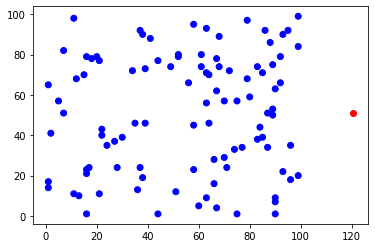

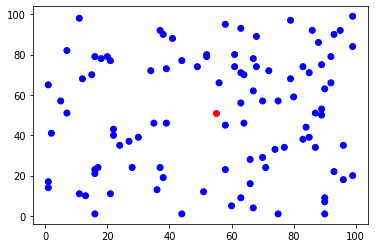

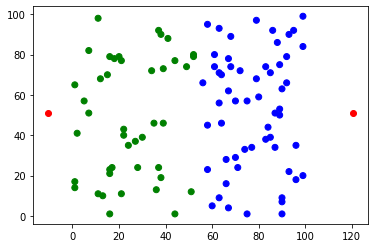

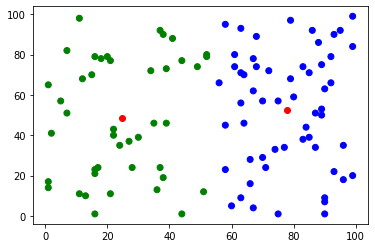

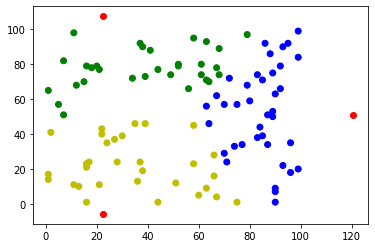

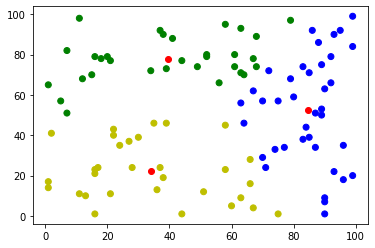

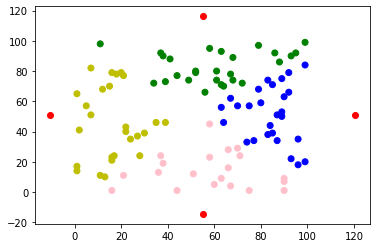

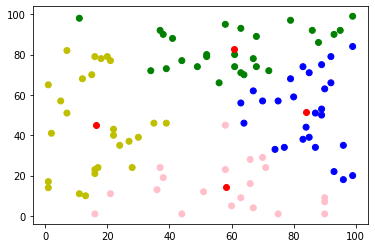

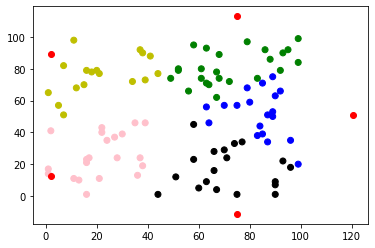

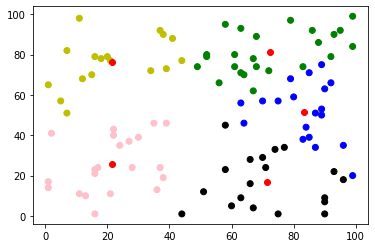

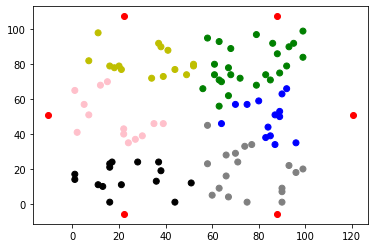

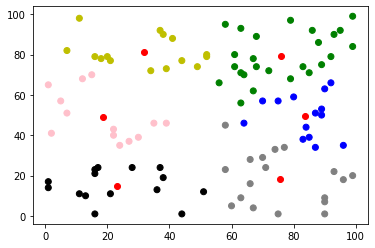

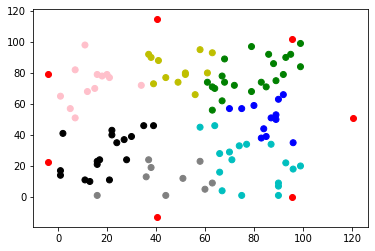

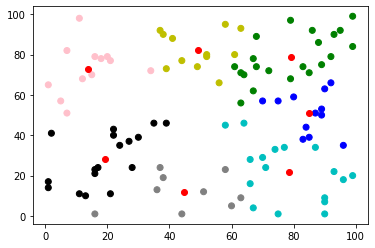

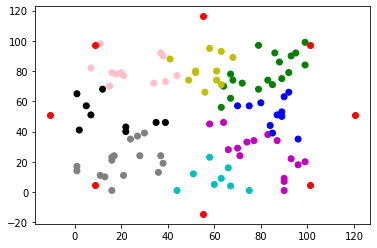

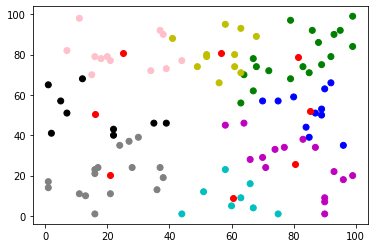

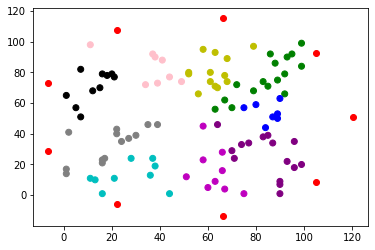

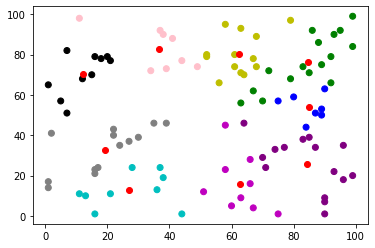

Количество оптимального количества K
5


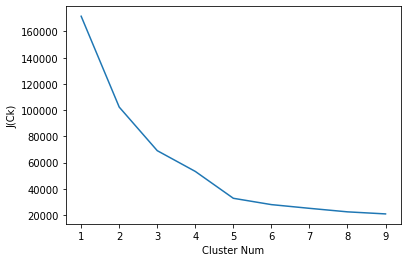

In [21]:
import matplotlib.pyplot as plt
import numpy as np

distance = []
optimal_k = 0
min = 1
min_k_bool = False

def random_point(n):
  points = []
  for i in range(n):
    points.append(np.random.randint(1, 100, 2))
  return points

def calculate_new_cluster(points, clusters, k, centroids):
    for i in range(0, k):
        z_x, z_y = [], []
        for j in range(0, len(clusters)):
            if clusters[j] == i:
                z_x.append(points[j][0])
                z_y.append(points[j][1])
        centroids[i][0] = np.mean(z_x)
        centroids[i][1] = np.mean(z_y)
    return centroids

def init_centroids(points, k):
  x_c = 0
  y_c = 0
  for i in range(len(points)):
    x_c += points[i][0]
    y_c += points[i][1]
  x_c /= len(points)
  y_c /= len(points)

  R = 0
  for i in range(len(points)):
    if R < dist([x_c, y_c], points[i]):
      R = dist([x_c, y_c], points[i])

  centroids = []
  for i in range(k):
    x_cntr = R*(np.cos(2*np.pi*i/k)) + x_c
    y_cntr = R*(np.sin(2*np.pi*i/k)) + y_c
    centroids.append([x_cntr, y_cntr])

  return centroids

def calculate_distance(points, centroids, cluster, k):
  global min
  global min_k_bool
  global optimal_k
  x_old = []
  y_old = []
  for i in range(0, len(centroids)):
    x_old.append(centroids[i][0])
    y_old.append(centroids[i][1])
  
  new_cluster = find_nearest(points, centroids)
  new_centroids = calculate_new_cluster(points, new_cluster, k, centroids)
  plot(points, centroids, cluster, k)

  count = 0
  for i in range(0, k):
    clusterSum = 0
    for j in range(0, len(new_cluster)):
      if (new_cluster[j] == i):
        clusterSum += dist(points[j], centroids[i]) ** 2
    count += clusterSum
  distance.append(count)

  if (len(distance) > 2 and not min_k_bool):
    if ((distance[len(distance) - 2] - distance[len(distance) - 1]) / (distance[len(distance) - 3] - distance[len(distance) - 2])) > min:
      min_k_bool = True
      optimal_k = k
    else:
      min = (distance[len(distance) - 2] - distance[len(distance) - 1]) / (distance[len(distance) - 3] - distance[len(distance) - 2])

  return True

def plot(points, centroids, cluster, k):
  clr = ['b', 'g', 'y', 'pink', 'k', 'grey', 'c', 'm', 'purple', 'brown']
  clrs = []

  points_x = []
  points_y = []
  for i in range(len(points)):
    points_x.append(points[i][0])
    points_y.append(points[i][1])
    clrs.append(clr[int(cluster[i])])

  centroids_x = []
  centroids_y = []
  for i in range(len(centroids)):
    centroids_x.append(centroids[i][0])
    centroids_y.append(centroids[i][1])

  plt.scatter(points_x, points_y, color = clrs)
  plt.scatter(centroids_x, centroids_y, color = 'r')
  plt.show()
  
def find_nearest(points, centroids):
  cluster = np.zeros(len(points))
  for i in range(len(points)):
    min_dist = np.infty
    for j in range(len(centroids)):
      if min_dist > dist(points[i], centroids[j]):
        min_dist = dist(points[i], centroids[j])
        cluster[i] = j
  return cluster

def dist(p_i, p_j):
  return np.sqrt((p_i[0] - p_j[0])**2+(p_i[1] - p_j[1])**2)

def kmeans(k, points):

  centroids = init_centroids(points, k)

  cluster = find_nearest(points, centroids)
  plot(points, centroids, cluster, k)

  while not calculate_distance(points, centroids, cluster, k):
    calculate_distance(points, centroids, cluster, k)

n = 100
points = random_point(n)

for i in range(1, 10):
  kmeans(i, points)

print("Количество оптимального количества K")
print(optimal_k)
plt.plot(range(1, 10), distance)
plt.xlabel('Cluster Num')
plt.ylabel('J(Ck)')
plt.show()